<a href="https://colab.research.google.com/github/0x416C657852/DiceClassificationCNN/blob/AlexTesting/DiceClassificationCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from __future__ import print_function
import keras
import tensorflow as tf
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, MaxPool2D
from keras.layers import Conv2D, MaxPooling2D
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import glob
import os
import cv2
from keras.optimizers import Adam
import pandas
%matplotlib inline

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

#drag and drop the diceZip.zip file into the files section. this brings
#loadtimes from 75 minutes for the first epoch to 10 minutes
#and all further epochs fro15 8 minutes to 10

In [3]:
!unzip diceZip -d diceData && echo "success" || echo "failure"

Streaming output truncated to the last 5000 lines.
  inflating: diceData/dice/train/d6/d6_top_0784.jpg  
  inflating: diceData/dice/train/d6/d6_top_0785.jpg  
  inflating: diceData/dice/train/d6/d6_top_0786.jpg  
  inflating: diceData/dice/train/d6/d6_top_0787.jpg  
  inflating: diceData/dice/train/d6/d6_top_0788.jpg  
  inflating: diceData/dice/train/d6/d6_top_0789.jpg  
  inflating: diceData/dice/train/d6/d6_top_0790.jpg  
  inflating: diceData/dice/train/d6/d6_top_0792.jpg  
  inflating: diceData/dice/train/d6/d6_top_0793.jpg  
  inflating: diceData/dice/train/d6/d6_top_0794.jpg  
  inflating: diceData/dice/train/d6/d6_top_0795.jpg  
  inflating: diceData/dice/train/d6/d6_top_0796.jpg  
  inflating: diceData/dice/train/d6/d6_top_0797.jpg  
  inflating: diceData/dice/train/d6/d6_top_0798.jpg  
  inflating: diceData/dice/train/d6/d6_top_0800.jpg  
  inflating: diceData/dice/train/d6/d6_top_0801.jpg  
  inflating: diceData/dice/train/d6/d6_top_0802.jpg  
  inflating: diceData/dice/trai

In [4]:
train_path = 'diceData/dice/train'
test_path = 'diceData/dice/valid'

In [51]:
generator = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input,validation_split=0.2)
train_batches = generator.flow_from_directory(directory=train_path, target_size=(480,480), classes=['d10', 'd12','d20','d4','d6','d8'], batch_size=64, subset='training')
valid_batches = generator.flow_from_directory(directory=train_path, target_size=(480,480), classes=['d10', 'd12','d20','d4','d6','d8'], batch_size=64, subset='validation')
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=test_path, target_size=(480,480), classes=['d10', 'd12','d20','d4','d6','d8'], batch_size=64)

Found 11429 images belonging to 6 classes.
Found 2855 images belonging to 6 classes.
Found 2102 images belonging to 6 classes.


In [52]:
imgs, labels = next(train_batches)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

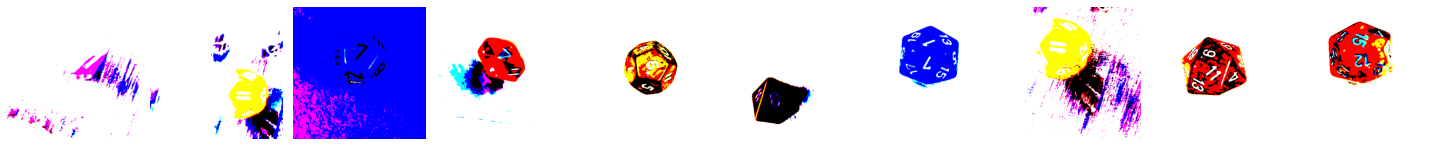

[[0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1.

In [53]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
plotImages(imgs)
print(labels)

In [59]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same', input_shape=(480,480,3)),
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Flatten(),
    Dense(units=6, activation='softmax')
])
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_100 (Conv2D)          (None, 480, 480, 32)      896       
_________________________________________________________________
conv2d_101 (Conv2D)          (None, 480, 480, 32)      9248      
_________________________________________________________________
max_pooling2d_49 (MaxPooling (None, 240, 240, 32)      0         
_________________________________________________________________
conv2d_102 (Conv2D)          (None, 240, 240, 64)      18496     
_________________________________________________________________
conv2d_103 (Conv2D)          (None, 240, 240, 64)      36928     
_________________________________________________________________
max_pooling2d_50 (MaxPooling (None, 120, 120, 64)      0         
_________________________________________________________________
conv2d_104 (Conv2D)          (None, 120, 120, 64)    

In [60]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [61]:
history = model.fit(x=train_batches,
    steps_per_epoch=len(train_batches),
    validation_data=valid_batches,
    validation_steps=len(valid_batches),
    epochs=10,
    verbose=1
)

Epoch 1/10
179/179 [==============================] - 210s 1s/step - loss: 8.2671 - accuracy: 0.4662 - val_loss: 5.2773 - val_accuracy: 0.3461
Epoch 2/10
179/179 [==============================] - 213s 1s/step - loss: 0.1461 - accuracy: 0.9579 - val_loss: 8.4895 - val_accuracy: 0.3461
Epoch 3/10
179/179 [==============================] - 213s 1s/step - loss: 0.0225 - accuracy: 0.9968 - val_loss: 10.9463 - val_accuracy: 0.1688
Epoch 4/10
179/179 [==============================] - 214s 1s/step - loss: 0.0491 - accuracy: 0.9879 - val_loss: 12.4301 - val_accuracy: 0.3363
Epoch 5/10
179/179 [==============================] - 213s 1s/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 13.4015 - val_accuracy: 0.3349
Epoch 6/10
179/179 [==============================] - 214s 1s/step - loss: 7.6681e-04 - accuracy: 1.0000 - val_loss: 14.4017 - val_accuracy: 0.3405
Epoch 7/10
179/179 [==============================] - 214s 1s/step - loss: 4.2974e-04 - accuracy: 1.0000 - val_loss: 14.9054 - val_acc

In [57]:
score = model.evaluate(test_batches, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

33/33 [==============================] - 17s 515ms/step - loss: 2.5644 - accuracy: 0.7712
Test loss: 2.5643773078918457
Test accuracy: 0.7711703181266785


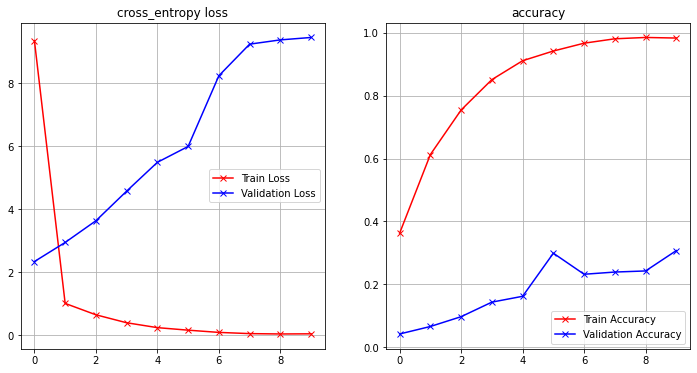

In [58]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["accuracy"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_accuracy"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)
    

plot_loss_accuracy(history)